<a href="https://www.kaggle.com/code/sharoneshibup/binary-prediction-with-a-rainfall-dataset?scriptVersionId=232386989" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e3/sample_submission.csv
/kaggle/input/playground-series-s5e3/train.csv
/kaggle/input/playground-series-s5e3/test.csv


In [2]:
df = pd.read_csv('/kaggle/input/playground-series-s5e3/train.csv')
df.info()
df.head()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             2190 non-null   int64  
 1   day            2190 non-null   int64  
 2   pressure       2190 non-null   float64
 3   maxtemp        2190 non-null   float64
 4   temparature    2190 non-null   float64
 5   mintemp        2190 non-null   float64
 6   dewpoint       2190 non-null   float64
 7   humidity       2190 non-null   float64
 8   cloud          2190 non-null   float64
 9   sunshine       2190 non-null   float64
 10  winddirection  2190 non-null   float64
 11  windspeed      2190 non-null   float64
 12  rainfall       2190 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 222.5 KB


,count,mean,std,min,25%,50%,75%,max
id,2190.0,1094.500000,632.342866,0.0,547.250,1094.50,1641.750,2189.0
day,2190.0,179.948402,105.203592,1.0,89.000,178.50,270.000,365.0
pressure,2190.0,1013.602146,5.655366,999.0,1008.600,1013.00,1017.775,1034.6
maxtemp,2190.0,26.365799,5.654330,10.4,21.300,27.80,31.200,36.0
temparature,2190.0,23.953059,5.222410,7.4,19.300,25.50,28.400,31.5
mintemp,2190.0,22.170091,5.059120,4.0,17.700,23.85,26.400,29.8
dewpoint,2190.0,20.454566,5.288406,-0.3,16.800,22.15,25.000,26.7
humidity,2190.0,82.036530,7.800654,39.0,77.000,82.00,88.000,98.0
cloud,2190.0,75.721918,18.026498,2.0,69.000,83.00,88.000,100.0
sunshine,2190.0,3.744429,3.626327,0.0,0.400,2.40,6.800,12.1


In [3]:
print(df.head())
df.shape

   id  day  pressure  maxtemp  temparature  mintemp  dewpoint  humidity  \
0   0    1    1017.4     21.2         20.6     19.9      19.4      87.0   
1   1    2    1019.5     16.2         16.9     15.8      15.4      95.0   
2   2    3    1024.1     19.4         16.1     14.6       9.3      75.0   
3   3    4    1013.4     18.1         17.8     16.9      16.8      95.0   
4   4    5    1021.8     21.3         18.4     15.2       9.6      52.0   

   cloud  sunshine  winddirection  windspeed  rainfall  
0   88.0       1.1           60.0       17.2         1  
1   91.0       0.0           50.0       21.9         1  
2   47.0       8.3           70.0       18.1         1  
3   95.0       0.0           60.0       35.6         1  
4   45.0       3.6           40.0       24.8         0  


(2190, 13)

In [4]:
df.isnull().sum()


id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
rainfall         0
dtype: int64

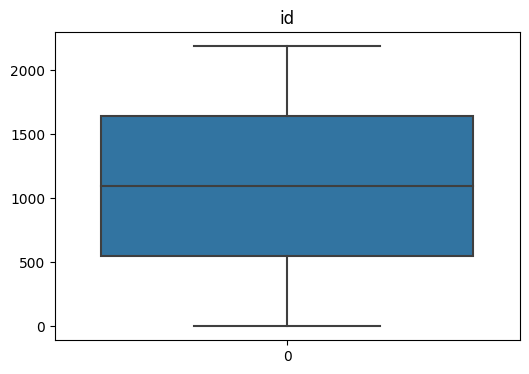

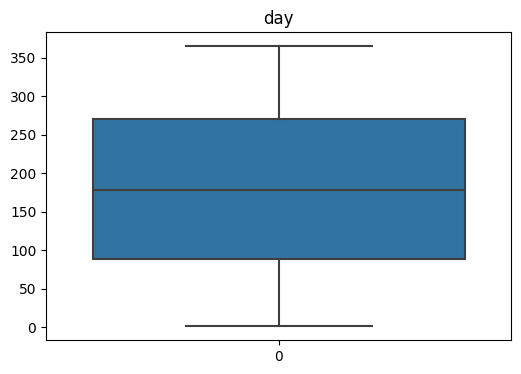

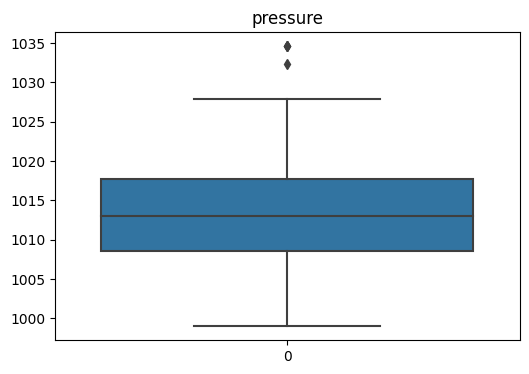

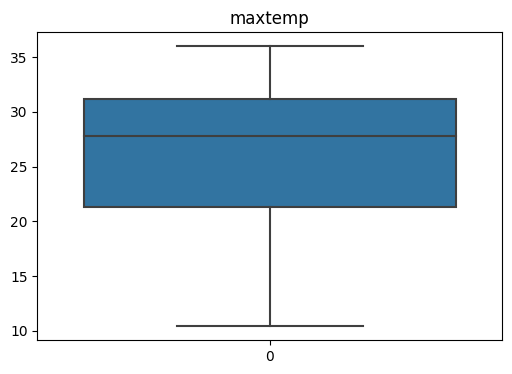

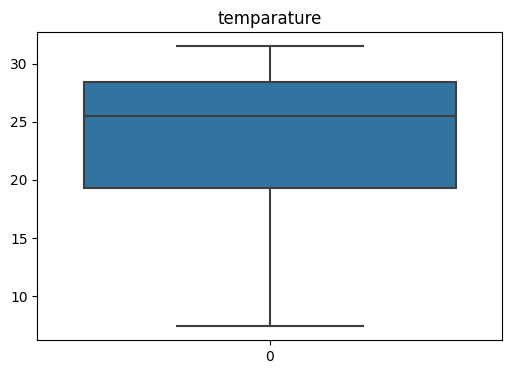

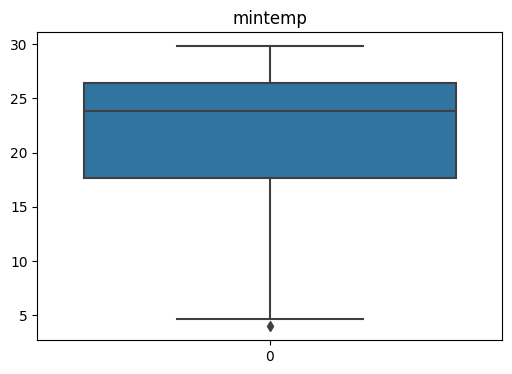

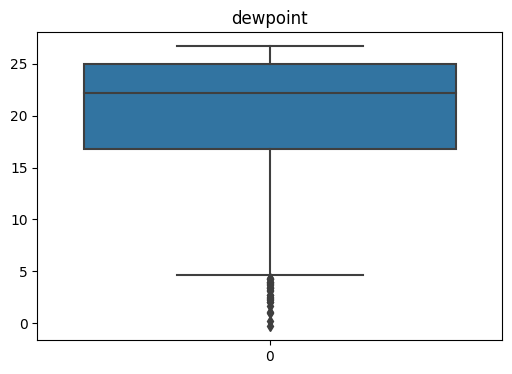

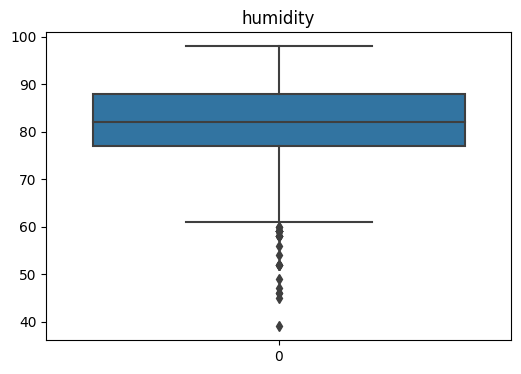

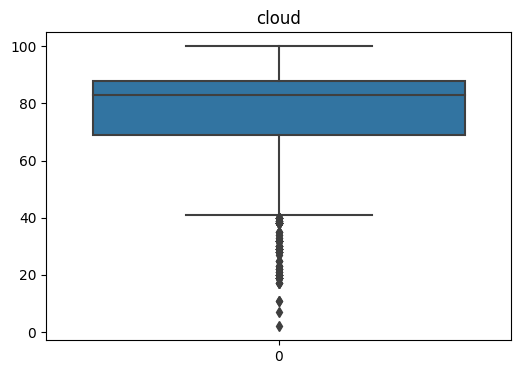

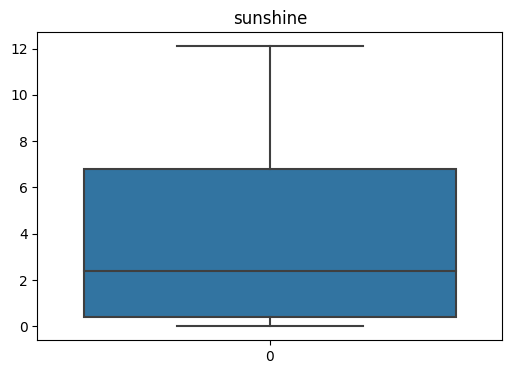

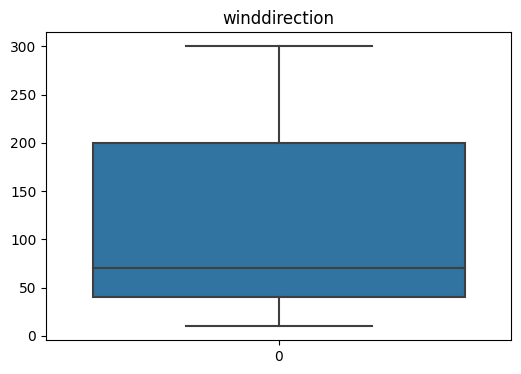

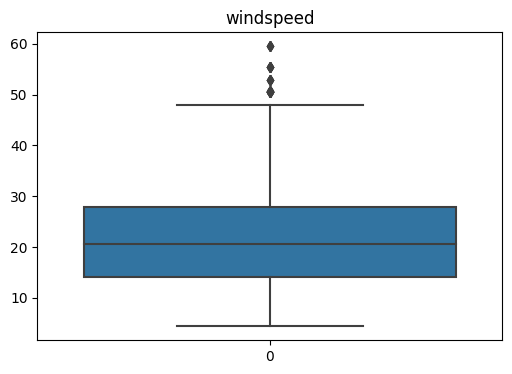

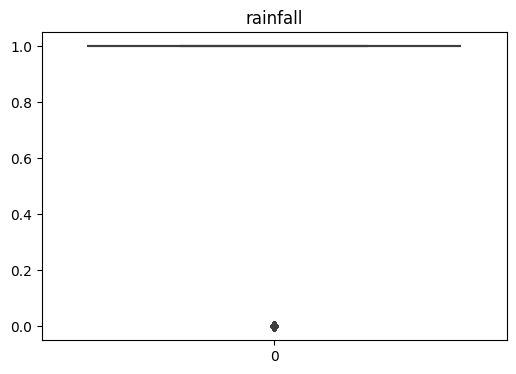

In [5]:
#outlier detection
import seaborn as sns
import matplotlib.pyplot as plt
#sns.boxplot(df['pressure'])
for column in df.columns:
    plt.figure(figsize= (6,4))
    sns.boxplot(df[column])
    plt.title(f'{column}')
    plt.show()
    

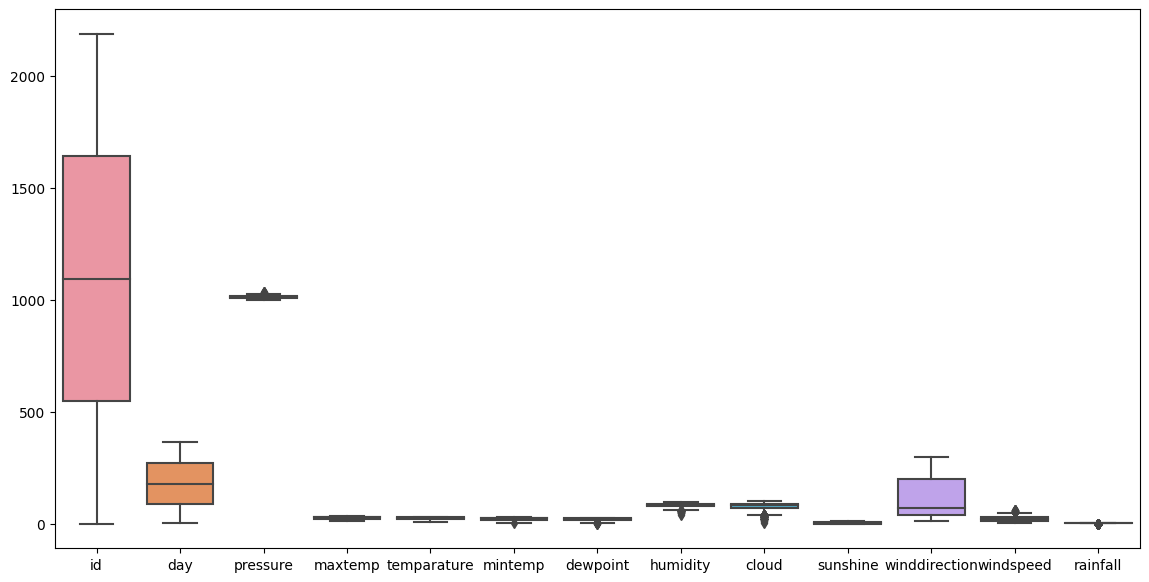

In [6]:
plt.figure(figsize =(14,7))
sns.boxplot(df)
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


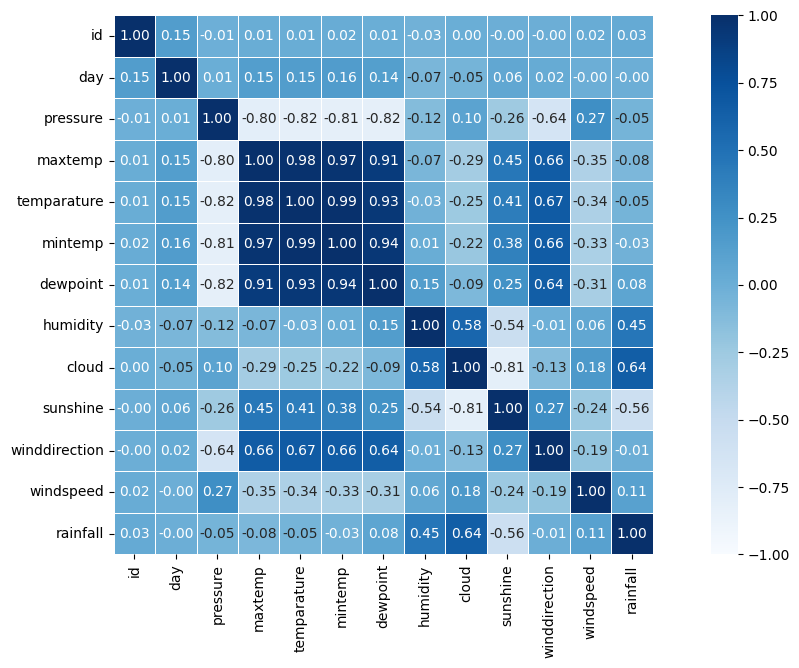

In [7]:
co_relation = df.corr()
plt.figure(figsize= (15,7))
sns.heatmap(co_relation,cmap="Blues",vmin = -1, vmax = 1, center = 0, annot=True, fmt=".2f", square=True, linewidths=.5)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier

x = df.drop(columns='rainfall')
y = df['rainfall']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=42)
x_train.shape
x_test.shape

#using decision stumps and adaboost
ada = AdaBoostClassifier(base_estimator= DecisionTreeClassifier(max_depth=1),n_estimators=100)
ada.fit(x_train,y_train)

y_pred = ada.predict(x_test)
print("accuracy:",accuracy_score(y_test,y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


accuracy: 0.8424657534246576


In [9]:
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(x_train,y_train)
y_pred4 =kn.predict(x_test)
print("accuracy: ",accuracy_score(y_test,y_pred))

accuracy:  0.8424657534246576


In [10]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(max_iter= 100000, class_weight= "balanced" ,random_state= 42,solver='liblinear')
lg.fit(x_train,y_train)
y_pred2 =lg.predict(x_test)
print("accuracy: ", accuracy_score(y_test,y_pred2))

accuracy:  0.8264840182648402


In [11]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
#rf = RandomForestClassifier()
#rf.fit(x_train,y_train)

param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}


rf = RandomForestClassifier()

rand_search = RandomizedSearchCV(rf, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a771f637c40>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a771f635a20>})

In [12]:
best_rf = rand_search.best_estimator_

print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'max_depth': 4, 'n_estimators': 351}


In [13]:
y_pred1 = rand_search.predict(x_test)
print("accuracy: ", accuracy_score(y_test,y_pred1))

accuracy:  0.8515981735159818


In [14]:
#ensemble using the above 3 ada, lg and rf
from sklearn.ensemble import VotingClassifier
em = VotingClassifier(estimators=[('lg',lg),('rf',rand_search),('ada',ada),('kn',kn)],
                     voting='hard')
em.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


VotingClassifier(estimators=[('lg',
                              LogisticRegression(class_weight='balanced',
                                                 max_iter=100000,
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomizedSearchCV(cv=5,
                                                 estimator=RandomForestClassifier(),
                                                 n_iter=5,
                                                 param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a771f637c40>,
                                                                      'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7a771f635a20>})),
                             ('ada',
                              AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                                 n_estimators=100)),
                             ('kn', KNeighborsClassifier(n_neighbors=3))])

In [15]:
y_pred3 = em.predict(x_test)
print("accuracy: ", accuracy_score(y_test,y_pred3))

accuracy:  0.8493150684931506


In [16]:
df1 = pd.read_csv('/kaggle/input/playground-series-s5e3/test.csv')

In [17]:
df1.isnull().sum()

id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    1
windspeed        0
dtype: int64

In [18]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
id,730.0,2554.500000,210.877136,2190.0,2372.250,2554.50,2736.750,2919.0
day,730.0,183.000000,105.438271,1.0,92.000,183.00,274.000,365.0
pressure,730.0,1013.503014,5.505871,1000.0,1008.725,1012.70,1017.600,1032.2
maxtemp,730.0,26.372466,5.672521,7.4,21.600,27.80,31.000,35.8
temparature,730.0,23.963288,5.278098,5.9,19.825,25.65,28.375,31.8
mintemp,730.0,22.110274,5.170744,4.2,17.825,23.90,26.400,29.1
dewpoint,730.0,20.460137,5.391169,-0.0,16.800,22.30,25.000,26.7
humidity,730.0,82.669863,7.818714,39.0,77.250,82.00,89.000,98.0
cloud,730.0,76.360274,17.934121,0.0,69.000,83.00,88.000,100.0
sunshine,730.0,3.664384,3.639272,0.0,0.325,2.20,6.675,11.8


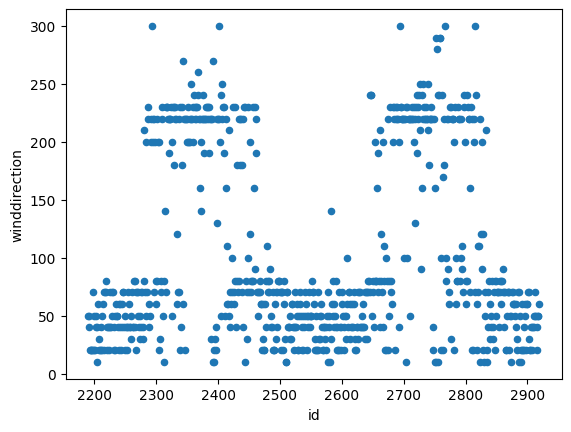

In [19]:
gf = df1.plot.scatter(x="id",y="winddirection")

In [20]:
#let us add the previous value as the wind direction missing value_ff fill
df1['winddirection'].fillna(method="bfill",inplace=True)
df1.isnull().sum()

<ipython-input-20-c1341ef92a95>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['winddirection'].fillna(method="bfill",inplace=True)
<ipython-input-20-c1341ef92a95>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['winddirection'].fillna(method="bfill",inplace=True)


id               0
day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [21]:
y1 = em.predict(df1)
y1 = pd.DataFrame(y1,columns=["rainfall"])
final =pd.concat([df1.id,y1],axis=1)
final.set_index('id',inplace=True)
final.to_csv(f"final_pred_em.csv")